## US Oil and Gas Production

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [3]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [4]:
gas_df.shape

(121, 20)

In [5]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [6]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [7]:
pd.to_datetime(gas_df['Month'])

0     2008-06-01
1     2008-07-01
2     2008-08-01
3     2008-09-01
4     2008-10-01
         ...    
116   2018-02-01
117   2018-03-01
118   2018-04-01
119   2018-05-01
120   2018-06-01
Name: Month, Length: 121, dtype: datetime64[ns]

In [8]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [10]:
gas_df.iloc[0]

Month                               2008-06-01
U.S.                                     70626
Alaska                                    8875
Arkansas                                  1196
Kansas                                    1024
Other States                              2995
Federal Offshore--Gulf of Mexico          7339
Wyoming                                   6839
West Virginia                              670
Utah                                      1198
Pennsylvania                               540
Texas                                    21446
Oklahoma                                  5241
Ohio                                       224
North Dakota                               243
New Mexico                                3975
Montana                                    323
Louisiana                                 3989
Colorado                                  3576
California                                 932
Name: 0, dtype: object

In [13]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

In [14]:
gas_df['Month']

0     2008-06-01
1     2008-07-01
2     2008-08-01
3     2008-09-01
4     2008-10-01
         ...    
116   2018-02-01
117   2018-03-01
118   2018-04-01
119   2018-05-01
120   2018-06-01
Name: Month, Length: 121, dtype: datetime64[ns]

In [15]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    datetime64[ns]
U.S.              int64
dtype: object

In [16]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [17]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

*How much gas has been produced yearly globally and in every state of the US?*

In [18]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             121 non-null    datetime64[ns]
 1   U.S.                              121 non-null    int64         
 2   Alaska                            121 non-null    int64         
 3   Arkansas                          121 non-null    int64         
 4   Kansas                            121 non-null    int64         
 5   Other States                      121 non-null    int64         
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64         
 7   Wyoming                           121 non-null    int64         
 8   West Virginia                     121 non-null    int64         
 9   Utah                              121 non-null    int64         
 10  Pennsylvania                      121 non-null    

In [20]:
gas_df.shape

(121, 20)

In [21]:
gas_df.head(10)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870
5,2008-11-01,71662,9876,1422,1092,3311,5297,7126,681,1275,524,22218,5145,245,269,4078,326,3916,3978,882
6,2008-12-01,71840,9972,1517,988,3064,5672,7297,657,1259,569,22112,5318,248,242,3957,302,3802,3998,866
7,2009-01-01,72643,9533,1605,1009,3006,6351,7067,679,1273,783,22211,5322,254,241,3968,304,3829,4330,876
8,2009-02-01,74077,10007,1627,1018,3280,6635,7220,695,1289,832,22025,5433,251,243,4063,311,3925,4353,871
9,2009-03-01,72983,9594,1679,994,2901,6726,7135,712,1300,758,22007,5262,245,245,4018,305,3941,4298,864


In [29]:
year = gas_df.groupby(gas_df['Month'].dt.year).sum()

In [30]:
year

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


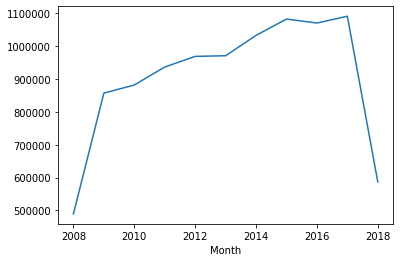

In [34]:
year["U.S."].plot()